In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Baltimore911.csv')
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,02/08/2020,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312.0,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1,1
1,02/08/2020,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333.0,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314.0,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314.0,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,02/08/2020,17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314.0,EASTERN,OLIVER,-76.595946,39.307350,NaN,ROW/TOWNHOUSE-OCC,Eastern 1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292756,01/01/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421.0,NORTHEAST,MORGAN STATE UNIVERS,-76.582056,39.340492,NaN,ROW/TOWNHOUSE-OCC,NaN,1
292757,05/01/1977,0:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531.0,NORTHERN,WYMAN PARK,-76.626880,39.328817,NaN,ROW/TOWNHOUSE-OCC,NaN,1
292758,06/01/1975,0:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822.0,SOUTHWEST,UPLANDS,-76.691297,39.289582,NaN,OTHER - INSIDE,NaN,1
292759,07/20/1969,21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534.0,NORTHERN,ROLAND PARK,-76.635300,39.358898,NaN,NaN,NaN,1


In [4]:
df.shape

(292761, 16)

### 1. Create a dataset profile table that gives an overview of the dataset.

In [5]:
import pandas as pd
import numpy as np

# Load your dataset (replace 'your_dataset.csv' with your dataset file path)
# df = pd.read_csv('your_dataset.csv')

# Create an empty list to store the results
results = []

for column in df.columns:
    column_data = df[column]

    if pd.api.types.is_numeric_dtype(column_data):
        # Calculate statistics for numeric columns
        min_value = column_data.min()
        max_value = column_data.max()
        mean_value = column_data.mean()
        median_value = column_data.median()
        std_deviation = column_data.std()

        results.append({
            "Column Name": column,
            "Data Type": column_data.dtype,
            "Numeric/Discrete": "Numeric",
            "Min": min_value,
            "Max": max_value,
            "Mean": mean_value,
            "Median": median_value,
            "Std Dev": std_deviation,
            "Unique Values": column_data.nunique(),
            "Top 3 Values": dict(column_data.value_counts().head(3)),
            "Missing Percentage": (column_data.isnull().sum() / len(df)) * 100
        })
    else:
        # Calculate statistics for discrete (categorical) columns
        unique_values = column_data.nunique()
        top_values = dict(column_data.value_counts().head(3))
        missing_percentage = (column_data.isnull().sum() / len(df)) * 100

        results.append({
            "Column Name": column,
            "Data Type": column_data.dtype,
            "Numeric/Discrete": "Discrete",
            "Min": None,
            "Max": None,
            "Mean": None,
            "Median": None,
            "Std Dev": None,
            "Unique Values": unique_values,
            "Top 3 Values": top_values,
            "Missing Percentage": missing_percentage
        })

# Convert the list of dictionaries to a DataFrame
result_df = pd.DataFrame(results)


In [6]:
num_rows = df.shape[0]
print(f"Number of rows: {num_rows}")

num_columns = df.shape[1]
print(f"Number of columns: {num_columns}")


result_df

Number of rows: 292761
Number of columns: 16


,Column Name,Data Type,Numeric/Discrete,Min,Max,Mean,Median,Std Dev,Unique Values,Top 3 Values,Missing Percentage
0,CrimeDate,object,Discrete,NaN,NaN,NaN,NaN,NaN,2300,"{'04/27/2015': 421, '06/05/2016': 255, '12/20/...",0.000000
1,CrimeTime,object,Discrete,NaN,NaN,NaN,NaN,NaN,1475,"{'18:00:00': 6772, '17:00:00': 6463, '12:00:00...",0.008881
2,CrimeCode,object,Discrete,NaN,NaN,NaN,NaN,NaN,81,"{'4E': 48061, '6D': 38977, '5A': 25351}",0.000000
3,Location,object,Discrete,NaN,NaN,NaN,NaN,NaN,27064,"{'1500 RUSSELL ST': 847, '3500 BOSTON ST': 708...",0.456345
4,Description,object,Discrete,NaN,NaN,NaN,NaN,NaN,14,"{'LARCENY': 65508, 'COMMON ASSAULT': 48061, 'B...",0.000000
5,Inside/Outside,object,Discrete,NaN,NaN,NaN,NaN,NaN,4,"{'O': 128776, 'I': 124454, 'Outside': 5113}",11.531591
6,Weapon,object,Discrete,NaN,NaN,NaN,NaN,NaN,5,"{'FIREARM': 29036, 'OTHER': 17313, 'KNIFE': 10...",78.982173
7,Post,object,Discrete,NaN,NaN,NaN,NaN,NaN,259,"{114.0: 4171, 913.0: 4109, 111.0: 3950}",0.811584
8,District,object,Discrete,NaN,NaN,NaN,NaN,NaN,10,"{'NORTHEAST': 44207, 'SOUTHEAST': 41816, 'CENT...",0.000000
9,Neighborhood,object,Discrete,NaN,NaN,NaN,NaN,NaN,278,"{'DOWNTOWN': 9312, 'FRANKFORD': 6922, 'BELAIR-...",3.587910


### Observation from the dataset:

#### Missing Data: 
The "Location 1" column has 100% missing values, indicating that there is no information available for this feature. It might be a good candidate for removal.

#### Spatial Data: 
The "Location" and "Location 1" columns likely represent spatial information. Further exploration and visualization of this data may reveal geographic patterns.

#### Imbalanced Data: 
The "Total Incidents" column appears to be highly imbalanced, with only one unique value (1) making up the majority of the data (100%). This suggests that this column may not be informative for modeling and may need to be further investigated.

 #### High Missingness: 
 The "Inside/Outside" and "Weapon" columns have relatively high percentages of missing values (11.53% and 78.98%, respectively). Depending on their importance, missing data could be imputed or handled using appropriate strategies.
 

### Data Cleaning:

<Axes: >

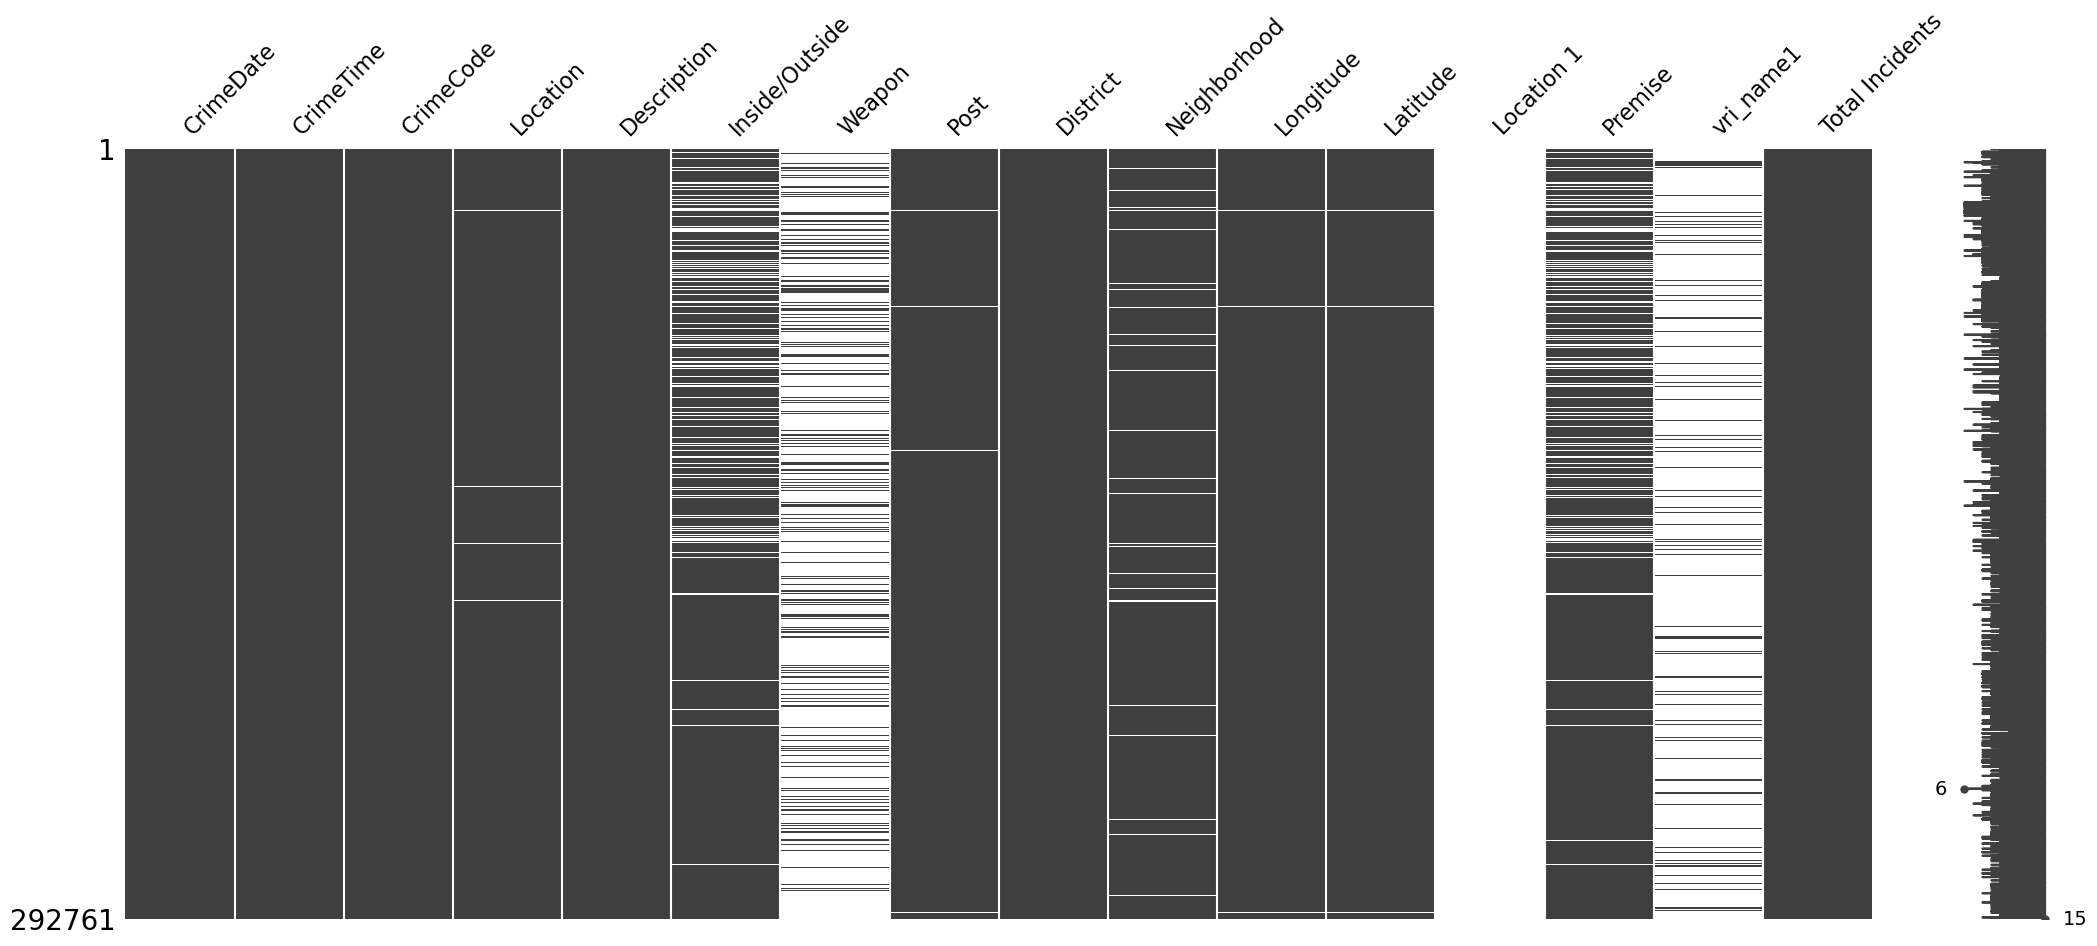

In [7]:
msno.matrix(df)

In [8]:
df = df.drop(columns=['Location 1', 'vri_name1'])
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise,Total Incidents
0,02/08/2020,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312.0,EASTERN,DARLEY PARK,-76.593870,39.315341,GROCERY/CONFECTION,1
1,02/08/2020,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333.0,EASTERN,MADISON EASTEND,-76.577425,39.299094,ROW/TOWNHOUSE-OCC,1
2,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314.0,EASTERN,OLIVER,-76.594992,39.306941,ROW/TOWNHOUSE-OCC,1
3,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314.0,EASTERN,OLIVER,-76.594992,39.306941,ROW/TOWNHOUSE-OCC,1
4,02/08/2020,17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314.0,EASTERN,OLIVER,-76.595946,39.307350,ROW/TOWNHOUSE-OCC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292756,01/01/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421.0,NORTHEAST,MORGAN STATE UNIVERS,-76.582056,39.340492,ROW/TOWNHOUSE-OCC,1
292757,05/01/1977,0:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531.0,NORTHERN,WYMAN PARK,-76.626880,39.328817,ROW/TOWNHOUSE-OCC,1
292758,06/01/1975,0:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822.0,SOUTHWEST,UPLANDS,-76.691297,39.289582,OTHER - INSIDE,1
292759,07/20/1969,21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534.0,NORTHERN,ROLAND PARK,-76.635300,39.358898,NaN,1


In [9]:
print(df.dtypes)

CrimeDate           object
CrimeTime           object
CrimeCode           object
Location            object
Description         object
Inside/Outside      object
Weapon              object
Post                object
District            object
Neighborhood        object
Longitude          float64
Latitude           float64
Premise             object
Total Incidents      int64
dtype: object


In [10]:
df = df.convert_dtypes()
df.dtypes

CrimeDate          string[python]
CrimeTime          string[python]
CrimeCode          string[python]
Location           string[python]
Description        string[python]
Inside/Outside     string[python]
Weapon             string[python]
Post                       object
District           string[python]
Neighborhood       string[python]
Longitude                 Float64
Latitude                  Float64
Premise            string[python]
Total Incidents             Int64
dtype: object

### 2. Generate a series of plots to describe the temporal pattern (year-to-year, monthly, and day-of-week) of the overall crime incidence aggregating from all geo-locations;

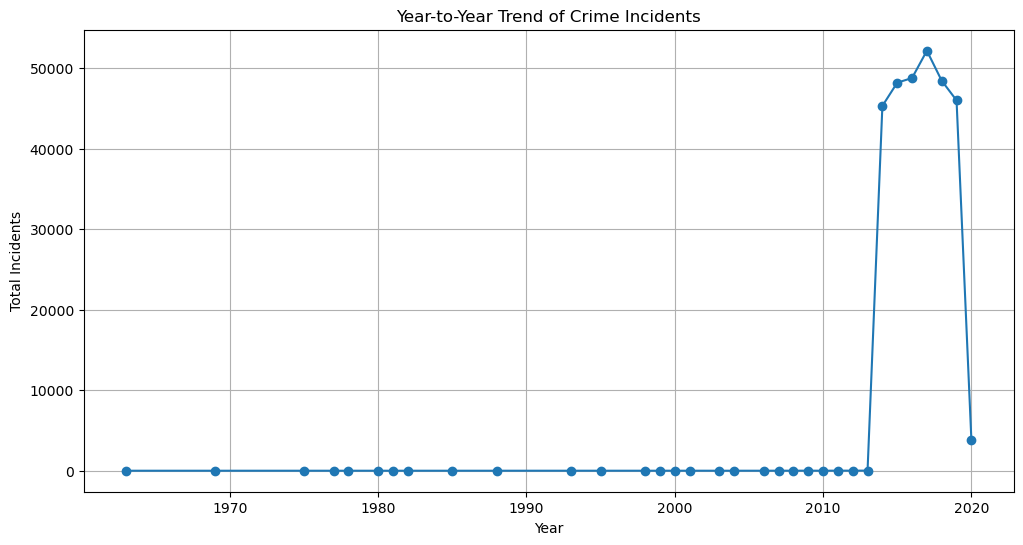

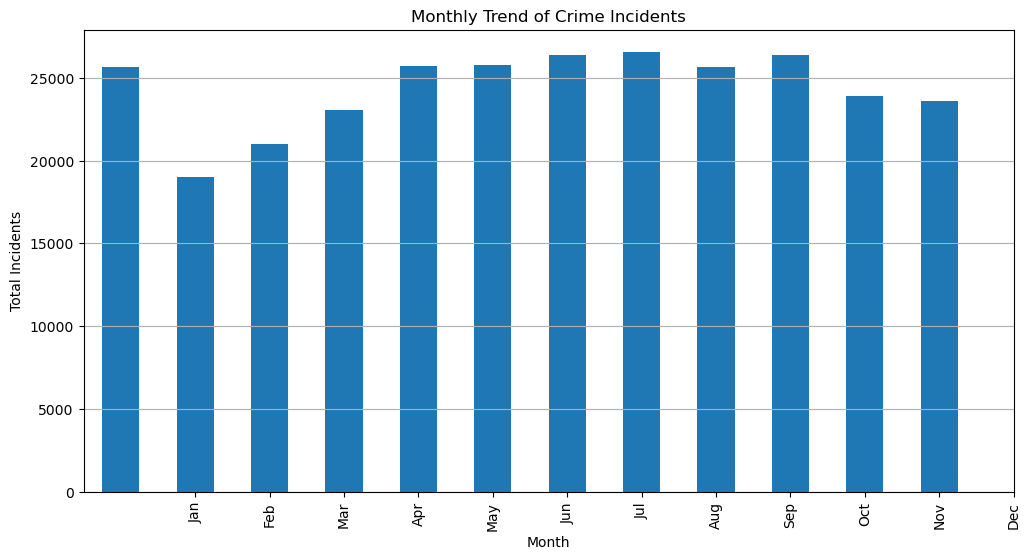

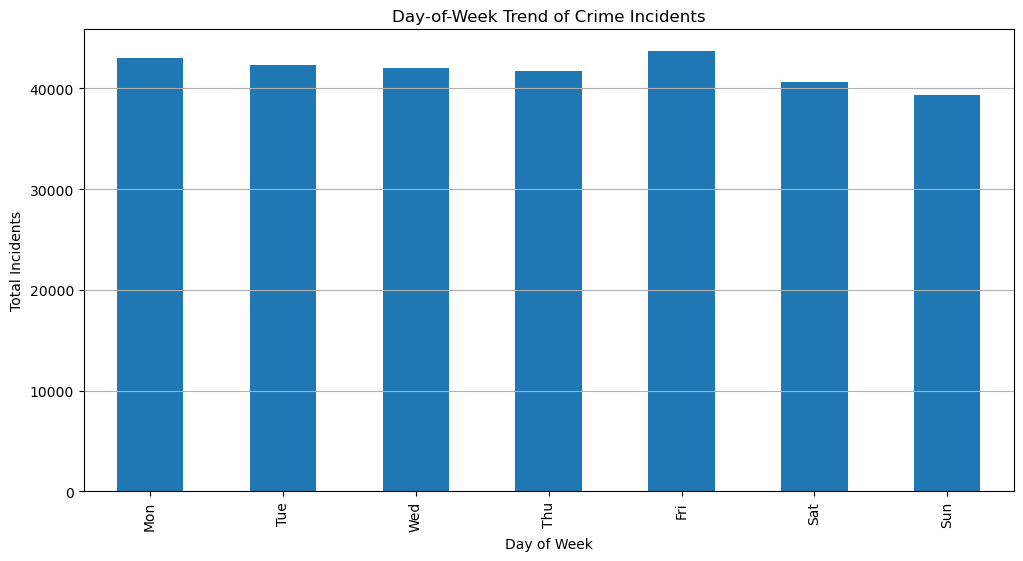

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year, month, and day of week from 'CrimeDate'
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek

# Calculate total incidents per year, month, and day of week
total_incidents_by_year = df.groupby('Year')['Total Incidents'].sum()
total_incidents_by_month = df.groupby('Month')['Total Incidents'].sum()
total_incidents_by_dayofweek = df.groupby('DayOfWeek')['Total Incidents'].sum()

# Plot year-to-year trend
plt.figure(figsize=(12, 6))
total_incidents_by_year.plot(kind='line', marker='o')
plt.title('Year-to-Year Trend of Crime Incidents')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.grid(True)
plt.show()

# Plot monthly trend
plt.figure(figsize=(12, 6))
total_incidents_by_month.plot(kind='bar')
plt.title('Monthly Trend of Crime Incidents')
plt.xlabel('Month')
plt.ylabel('Total Incidents')
plt.grid(axis='y')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Plot day-of-week trend
day_of_week_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(12, 6))
total_incidents_by_dayofweek.plot(kind='bar')
plt.title('Day-of-Week Trend of Crime Incidents')
plt.xlabel('Day of Week')
plt.ylabel('Total Incidents')
plt.grid(axis='y')
plt.xticks(range(7), day_of_week_labels)
plt.show()


### 3. Generate a plot describing the distribution of crime type aggregating from all geo-locations and all time periods


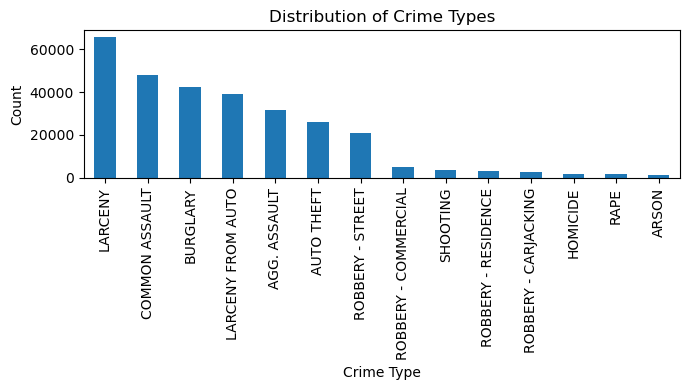

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Description' (crime type) and calculate the count
crime_type_counts = df['Description'].value_counts()

# Plot the distribution of crime types
plt.figure(figsize=(7, 4))
crime_type_counts.plot(kind='bar')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


### 4. Generate a series of plots to illustrate how crime type distributions might vary from year-to-year, month-to-month, or by day-of-week aggregating across all locations

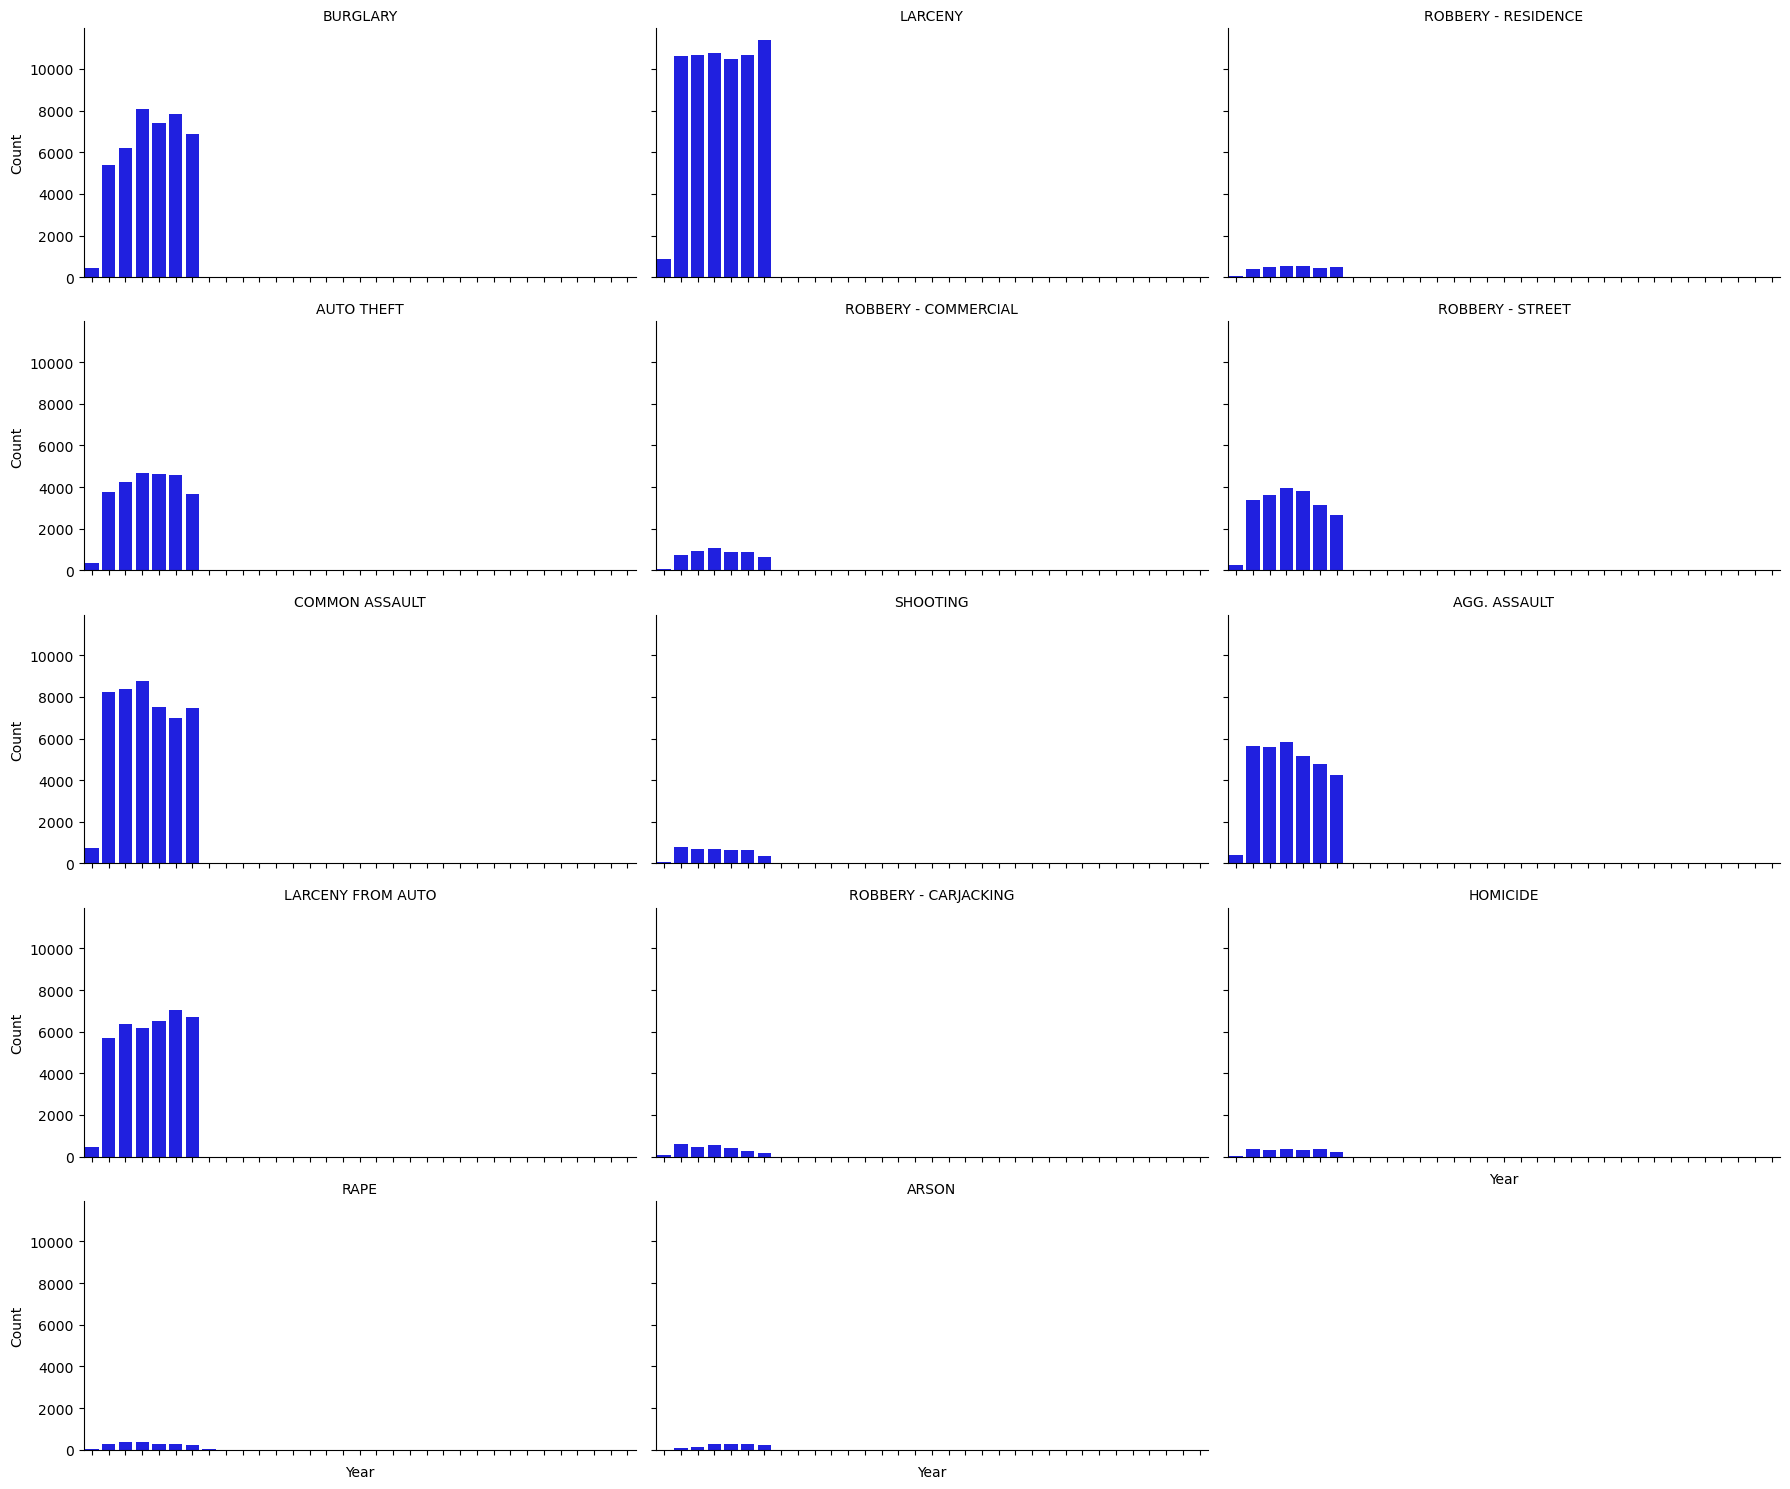

In [13]:
# Extract the year from the 'CrimeDate' column
df['Year'] = df['CrimeDate'].dt.year

# Create a facet grid for crime type distribution year-to-year
g = sns.FacetGrid(data=df, col='Description', col_wrap=3, height=3, aspect=2, palette='viridis')
g.map(sns.countplot, 'Year', order=df['Year'].unique(), color='b')
g.set_axis_labels('Year', 'Count')
g.set_titles(col_template="{col_name}")

# Rotate x-axis labels with 60-degree angle
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

g.tight_layout()
plt.show()

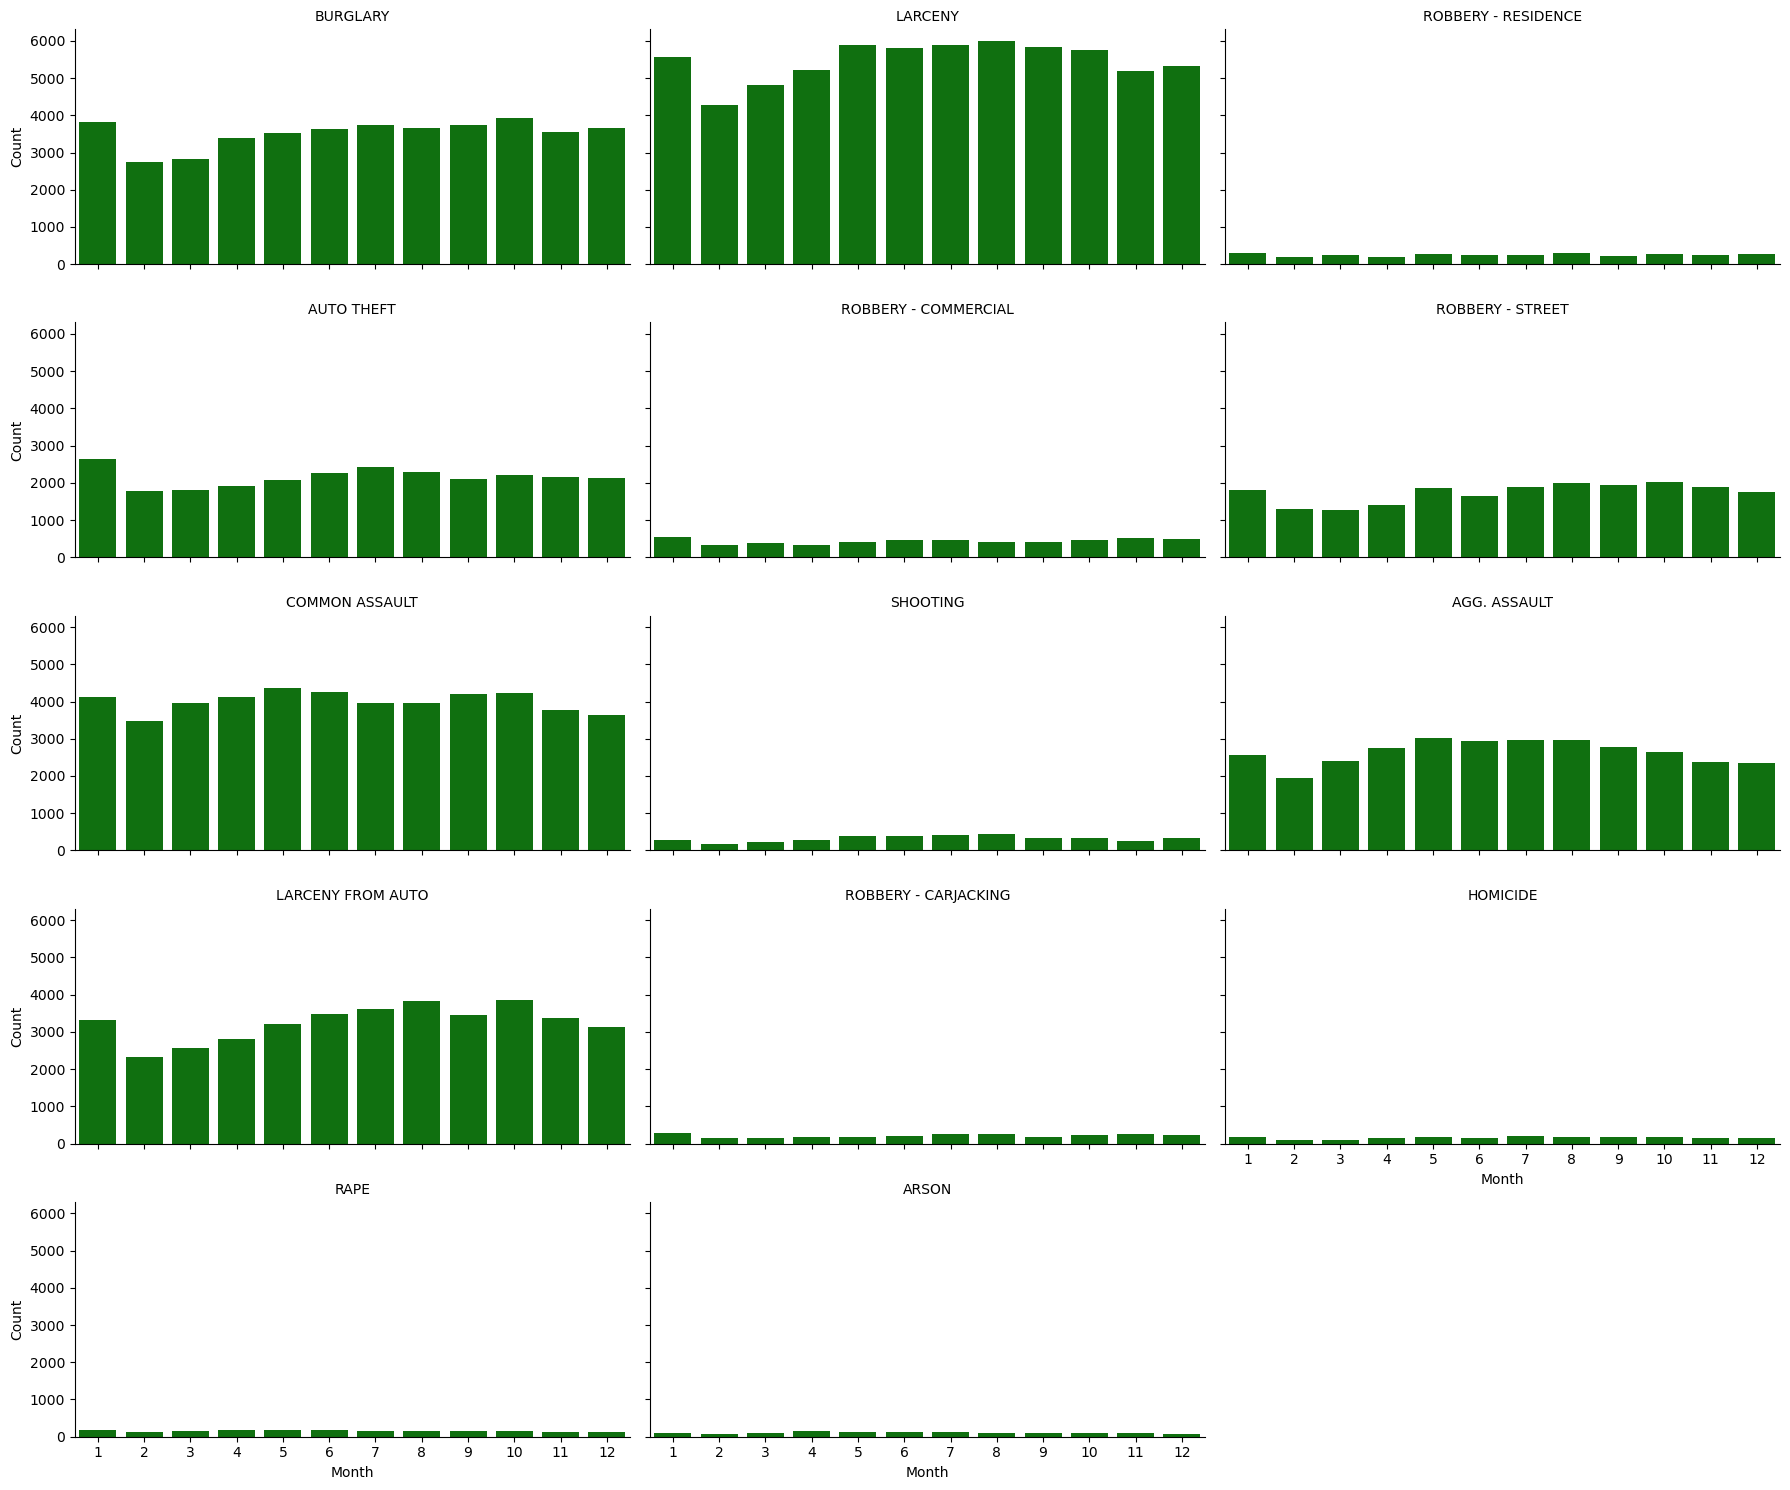

In [14]:
# Extract the month from the 'CrimeDate' column
df['Month'] = df['CrimeDate'].dt.month

# Create a facet grid for crime type distribution month-to-month
g = sns.FacetGrid(data=df, col='Description', col_wrap=3, height=3, aspect=2, palette='viridis')
g.map(sns.countplot, 'Month', order=range(1, 13), color='g')
g.set_axis_labels('Month', 'Count')
g.set_titles(col_template="{col_name}")
g.tight_layout()
plt.show()

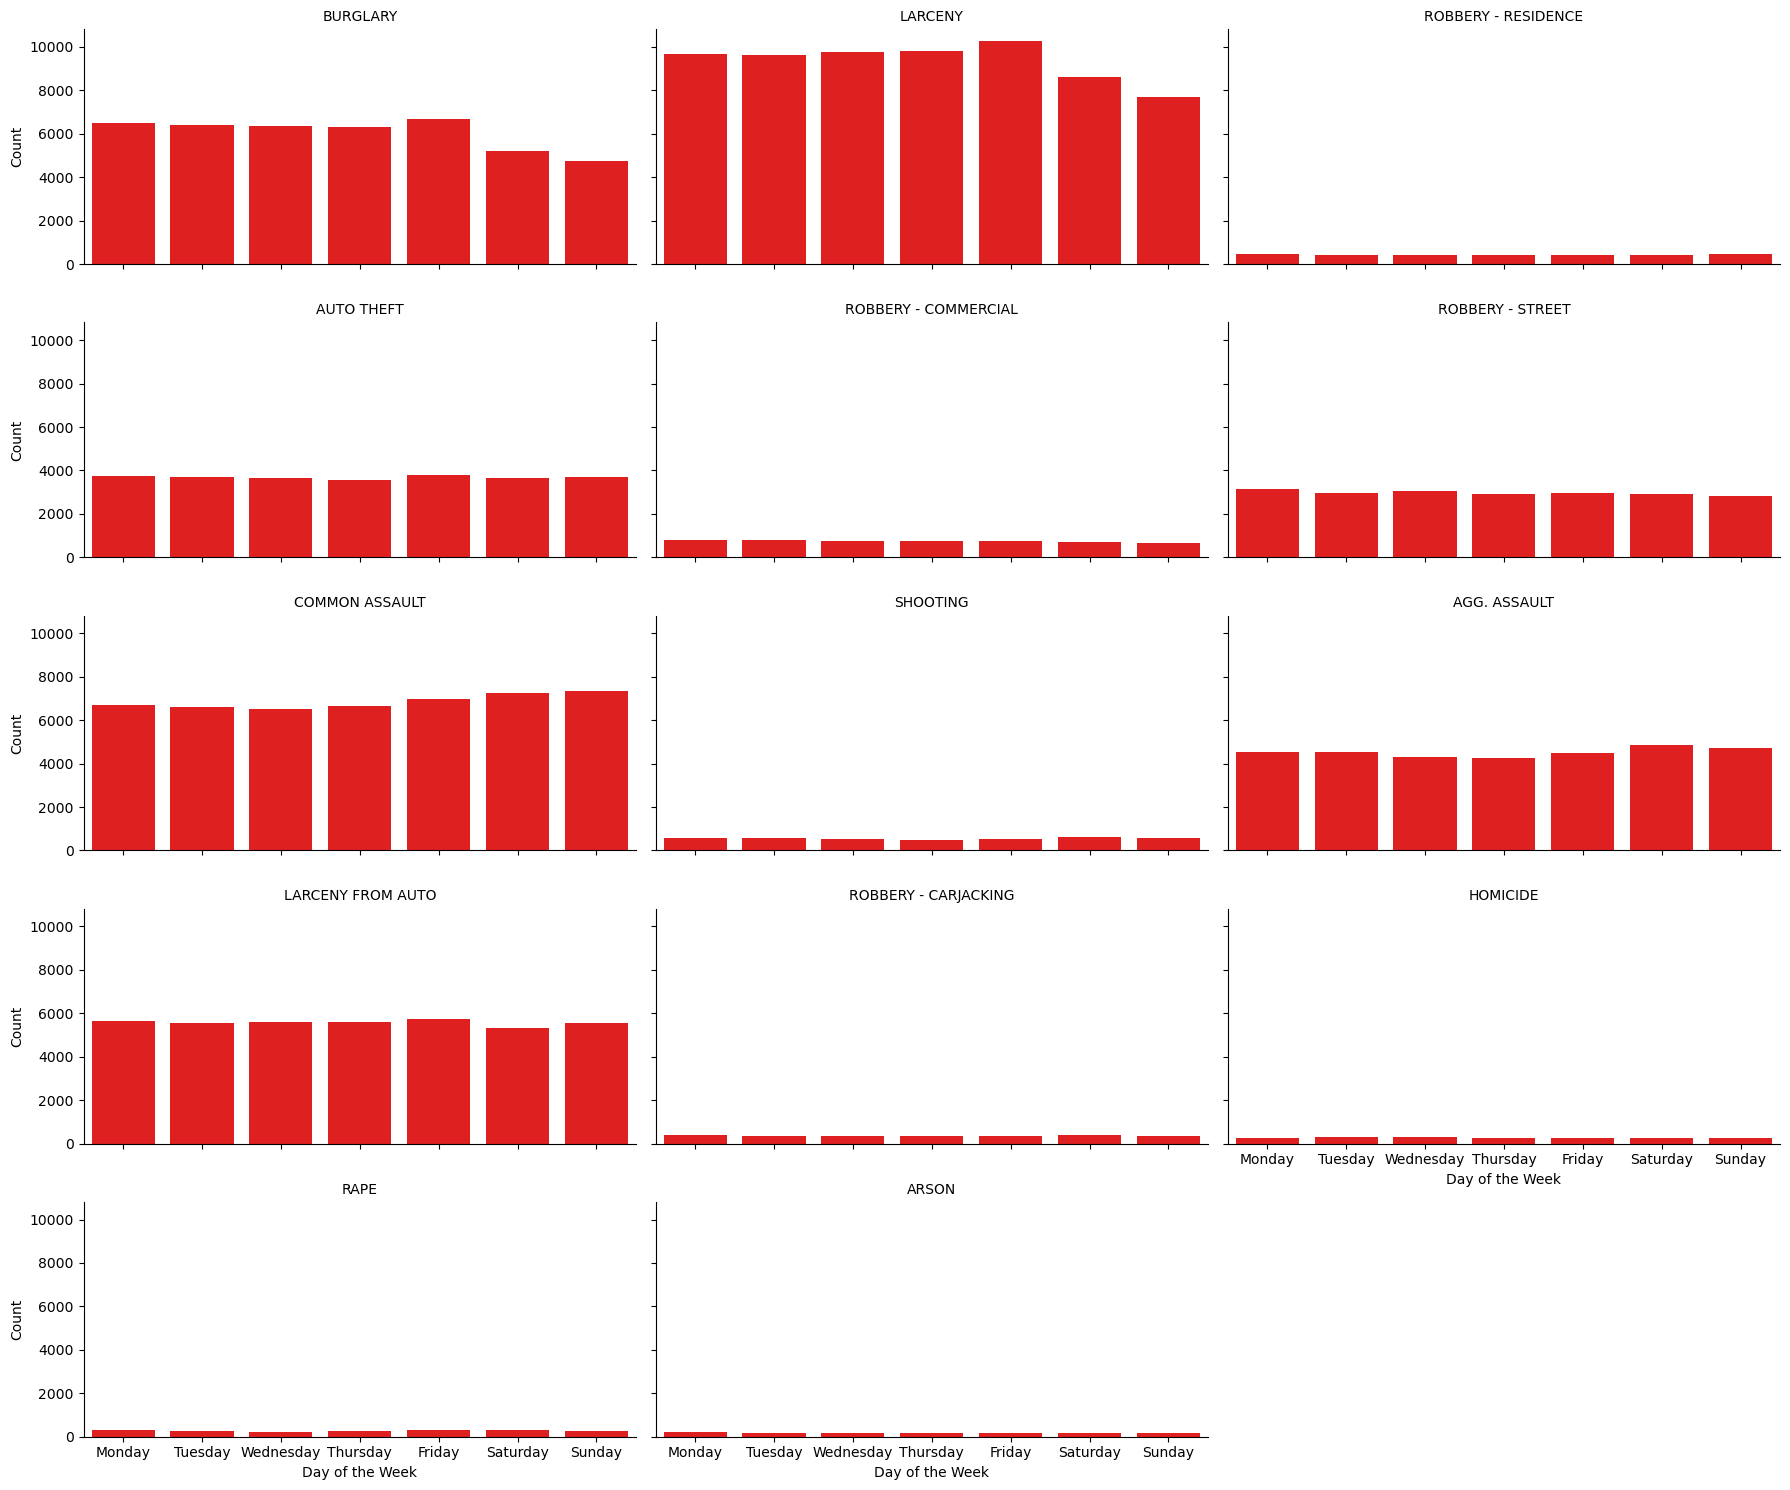

In [15]:
# Extract the day of the week from the 'CrimeDate' column
df['DayOfWeek'] = df['CrimeDate'].dt.day_name()

# Create a facet grid for crime type distribution by day of the week
g = sns.FacetGrid(data=df, col='Description', col_wrap=3, height=3, aspect=2, palette='viridis')
g.map(sns.countplot, 'DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='r')
g.set_axis_labels('Day of the Week', 'Count')
g.set_titles(col_template="{col_name}")
g.tight_layout()
plt.show()

### 5. Design a dashboard that allows users like Gary to explore the spatial and temporal patterns of crime. You may get inspiration from tasks 2-4, but feel free to add insights. Bonus: Create a real dynamic dashboard that allows users to change parameters such as location and time period

In [16]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import dash_table

In [17]:

app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Crime Dashboard"),
    
    dcc.DatePickerRange(
        id='date-range-picker',
        start_date=df['CrimeDate'].min(),
        end_date=df['CrimeDate'].max(),
        display_format='YYYY-MM-DD',
    ),
    
    dcc.Dropdown(
        id='location-dropdown',
        options=[
            {'label': location, 'value': location}
            for location in df['Location'].unique()
        ],
        multi=True,
        placeholder="Select Location(s)",
    ),
    
    dcc.Graph(id='crime-map'),
    
    dcc.Graph(id='crime-count-histogram'),
])

# Callback to update the map based on selected date range and location(s)
@app.callback(
    Output('crime-map', 'figure'),
    Output('crime-count-histogram', 'figure'),
    [Input('date-range-picker', 'start_date'),
     Input('date-range-picker', 'end_date'),
     Input('location-dropdown', 'value')]
)
def update_figures(start_date, end_date, selected_locations):
    filtered_df = df[(df['CrimeDate'] >= start_date) & (df['CrimeDate'] <= end_date)]
    
    if selected_locations:
        filtered_df = filtered_df[filtered_df['Location'].isin(selected_locations)]
    
    # Check if the filtered_df is empty
    if filtered_df.empty:
        # Return an empty map or a message indicating no data
        fig_map = px.scatter()
    else:
        fig_map = px.scatter_mapbox(
            filtered_df,
            lat='Latitude',
            lon='Longitude',
            hover_name='Description',
            color='Description',
            zoom=12,  # Adjust the zoom level for a more detailed map
        )
    
        fig_map.update_layout(
            mapbox_style="carto-positron",
            mapbox_zoom=10,  # You can adjust this value for initial zoom level
            mapbox_center={"lat": filtered_df['Latitude'].mean(), "lon": filtered_df['Longitude'].mean()},  # Center the map on data
        )
    
    # Create a crime count histogram
    fig_hist = px.histogram(
        filtered_df,
        x='CrimeDate',
        title='Crime Count by Date',
        labels={'CrimeDate': 'Date', 'count': 'Crime Count'},
    )
    
    return fig_map, fig_hist

if __name__ == '__main__':
    app.run_server(debug=True)
